# Link Prediction in Ecological Networks using Latent Space Representation of Network Graphs - Data_Exploration


This Jupyter Notebook is used for the task of analysing the GATEWAy dataset and for generating visualisations.

In [1]:
#Importing and installing all necessary libraries
try:
  import stellargraph as sg
except:
  %pip install -q stellargraph[demos]==1.2.1

from stellargraph.data import EdgeSplitter
from stellargraph import StellarGraph

     |████████████████████████████████| 435 kB 12.7 MB/s 
     |████████████████████████████████| 500 kB 64.7 MB/s 
     |████████████████████████████████| 41 kB 326 kB/s 


In [2]:
try:
    import karateclub
except ModuleNotFoundError:
    ! pip install karateclub
from karateclub import DeepWalk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 1.8 MB 31.4 MB/s 
     |████████████████████████████████| 24.1 MB 1.7 MB/s 
     |████████████████████████████████| 50 kB 2.8 MB/s 
  Created wheel for karateclub: filename=karateclub-1.3.1-py3-none-any.whl size=98990 sha256=4d4a30751019acede70a6f99eb87d99cd25be53bd49e3d7636cd016493da668a
  Stored in directory: /root/.cache/pip/wheels/7f/26/cb/2e29223e5262e492eebf09c1cbdb6a613126984f5d855b2612
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149873 sha256=b6eea691ff6f1f46d507aca5f7f0c830f231d7ef191da92ce4dedce8a82969f5
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built karateclub python-Levenshtein
  Attempting uninstall: gensim
    Found existing installation: g

In [3]:
try:
    import geopandas
except ModuleNotFoundError:
    !pip install geopandas
    import geopandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 14.3 MB/s 
     |████████████████████████████████| 16.7 MB 48.4 MB/s 
     |████████████████████████████████| 6.3 MB 59.1 MB/s 


In [4]:
import networkx as nx
import numpy as np
import pandas as pd
from sklearn import manifold
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
%matplotlib inline

import requests, zipfile, io
import os.path

In [5]:
#Loading the GATEWay dataset in a data frame and displaying it
file_name='283_2_FoodWebDataBase_2018_12_10.csv'

if not os.path.isfile(file_name):
  zip_file_url="https://idata.idiv.de/ddm/Data/DownloadZip/283?version=756"
  r = requests.get(zip_file_url)
  z = zipfile.ZipFile(io.BytesIO(r.content))
  z.extractall()

In [6]:
df = pd.read_csv('283_2_FoodWebDataBase_2018_12_10.csv')
df.columns = df.columns.str.replace("[.]", "_")
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,8,12,13,22,26,27,41,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,autoID,link_citation,link_methodology,interaction_type,interaction_dimensionality,interaction_classification,con_taxonomy,con_taxonomy_level,con_common,con_lifestage,...,latitude,ecosystem_type,study_site,altitude,depth,sampling_time,sampling_start_year,sampling_end_year,notes,foodweb_name
0,1,Cattin Blandenier (2004),published account internet field natural history,predacious,NaN,ibi,Vulpes vulpes,NaN,NaN,NaN,...,46.938450,terrestrial aboveground,Grand Caricaie,-999.0,-999.0,NaN,NaN,NaN,NaN,Grand Caricaie marsh dominated by Cladietum m...
1,2,Cattin Blandenier (2004),published account internet field natural history,predacious,2D,ibi,Emberiza schoeniclus,species,NaN,NaN,...,46.938450,terrestrial aboveground,Grand Caricaie,-999.0,-999.0,NaN,NaN,NaN,NaN,Grand Caricaie marsh dominated by Cladietum m...
2,3,Cattin Blandenier (2004),published account internet field natural history,predacious,2D,ibi,Emberiza schoeniclus,species,NaN,NaN,...,46.938450,terrestrial aboveground,Grand Caricaie,-999.0,-999.0,NaN,NaN,NaN,NaN,Grand Caricaie marsh dominated by Cladietum m...
3,4,Cattin Blandenier (2004),published account internet field natural history,predacious,2D,ibi,Vulpes vulpes,NaN,NaN,NaN,...,46.938450,terrestrial aboveground,Grand Caricaie,-999.0,-999.0,NaN,NaN,NaN,NaN,Grand Caricaie marsh dominated by Cladietum m...
4,5,Cattin Blandenier (2004),published account internet field natural history,predacious,3D,ibi,Emberiza schoeniclus,species,NaN,NaN,...,46.938450,terrestrial aboveground,Grand Caricaie,-999.0,-999.0,NaN,NaN,NaN,NaN,Grand Caricaie marsh dominated by Cladietum m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222146,222147,Warren (1989),Field; gut/stomach analysis; feeding trial; pu...,detritivorous,NaN,nibi,Corynoneura scutellata,species,Diptera,larvae,...,53.827343,lakes,Skipwith Pond,-999.0,-999.0,NaN,NaN,NaN,NaN,Skipwith Pond
222147,222148,Warren (1989),Field; gut/stomach analysis; feeding trial; pu...,detritivorous,NaN,nibi,Chironomus dorsalis,species,Diptera,larvae,...,53.827343,lakes,Skipwith Pond,-999.0,-999.0,NaN,NaN,NaN,NaN,Skipwith Pond
222148,222149,Warren (1989),Field; gut/stomach analysis; feeding trial; pu...,detritivorous,NaN,nibi,Glyptotendipes pallens,species,Diptera,larvae,...,53.827343,lakes,Skipwith Pond,-999.0,-999.0,NaN,NaN,NaN,NaN,Skipwith Pond
222149,222150,Warren (1989),Field; gut/stomach analysis; feeding trial; pu...,detritivorous,NaN,nibi,Tanytarsus bruchonidae,species,Diptera,larvae,...,53.827343,lakes,Skipwith Pond,-999.0,-999.0,NaN,NaN,NaN,NaN,Skipwith Pond


In [7]:
#Listing all the available features
df.columns.values.tolist()

['autoID',
 'link_citation',
 'link_methodology',
 'interaction_type',
 'interaction_dimensionality',
 'interaction_classification',
 'con_taxonomy',
 'con_taxonomy_level',
 'con_common',
 'con_lifestage',
 'con_metabolic_type',
 'con_movement_type',
 'con_size_citation',
 'con_size_method',
 'con_length_min_cm_',
 'con_length_mean_cm_',
 'con_length_max_cm_',
 'con_mass_min_g_',
 'con_mass_mean_g_',
 'con_mass_max_g_',
 'res_taxonomy',
 'res_taxonomy_level',
 'res_common',
 'res_lifestage',
 'res_metabolic_type',
 'res_movement_type',
 'res_size_citation',
 'res_size_method',
 'res_length_min_cm_',
 'res_length_mean_cm_',
 'res_length_max_cm_',
 'res_mass_min_g_',
 'res_mass_mean_g_',
 'res_mass_max_g_',
 'geographic_location',
 'longitude',
 'latitude',
 'ecosystem_type',
 'study_site',
 'altitude',
 'depth',
 'sampling_time',
 'sampling_start_year',
 'sampling_end_year',
 'notes',
 'foodweb_name']

In [8]:
#Listing all the unique geographic locations
df.geographic_location.value_counts()

Germany                                             93266
USA                                                 24247
Eastern Weddell Sea Shelf, Antarctica               16041
United Kingdom                                      15973
Switzerland, Lake Neuchatel                         11497
Portugal                                            10325
Florida Key islands, Florida Bay, USA                8191
Tributaries of the Taieri River, New Zealand         5856
Chile                                                5396
Ireland/West Cork/Skibbereen                         5068
Santa Barbara, California, USA                       3960
Brasil (CE)                                          3873
Puerto Rico-Virgin Islands (PRVI) shelf complex      3313
Soest, Netherlands                                   2336
Mozambique                                           2078
England                                              1753
Arctic Shelf Area, Arctic                            1661
Canada        

In [9]:
#Listing the number of unique geographic locations
len(df.geographic_location.value_counts())

28

In [10]:
#Listing all the unique study sites
df.study_site.value_counts()

Biodiversity Exploratory soil food webs                               93266
Intertidal rocky pools                                                21600
Eastern Weddell Sea Shelf                                             16041
Cheseapeake Bay                                                       15821
UK streams                                                            13230
Grand Caricaie                                                        11497
Adirondack lakes                                                       8426
Florida mangrove islands                                               8191
NewZealandStreams                                                      5856
Lough Hyne                                                             5068
California salt marsh                                                  3960
Puerto Rico-Virgin Islands (PRVI) shelf complex                        3313
UK Streams                                                             2743
DutchSoil   

In [11]:
#Listing the number of unique study sites
len(df.study_site.value_counts())

33

In [12]:
#Listing all the unique food webs
df.foodweb_name.value_counts()

Weddell Sea         16041
Chesapeake Bay      15821
Lough Hyne           5068
Carpinteria          3960
FloridaIslandE3      3671
                    ...  
Svalbard               21
Brook trout lake       19
AP1                    17
Twin Lake East         17
SF1M2                  16
Name: foodweb_name, Length: 290, dtype: int64

In [13]:
#Listing the number of unique food webs
len(df.foodweb_name.value_counts())

290

In [14]:
#Listing all the unique ecosystem types
df.ecosystem_type.value_counts()

terrestrial belowground    95985
marine                     69981
terrestrial aboveground    23260
streams                    23095
lakes                       9830
Name: ecosystem_type, dtype: int64

In [15]:
#Listing some of the biggest food webs (from largest to smallest)
df.foodweb_name.value_counts()[:30]

Weddell Sea                                                            16041
Chesapeake Bay                                                         15821
Lough Hyne                                                              5068
Carpinteria                                                             3960
FloridaIslandE3                                                         3671
FloridaIslandE1                                                         3560
Wensum Stream                                                           3504
AEW02                                                                   3345
Caribbean Reef                                                          3313
HEW36                                                                   3251
Test Stream                                                             3195
HEW05                                                                   3138
HEW47                                                                   3073

In [16]:
#Displaying the ecosystem type(s) for every geographic location
list_of_geographic_locations=df.geographic_location.unique()
for i in range(len(list_of_geographic_locations)):
  print()
  print()
  print(list_of_geographic_locations[i])
  print()
  print(df.loc[df.geographic_location==list_of_geographic_locations[i]].ecosystem_type.value_counts())
  print()
  print()



Switzerland, Lake Neuchatel

terrestrial aboveground    11456
lakes                         41
Name: ecosystem_type, dtype: int64




Ythan Estuary, Aberdeen, Scotland

marine    417
Name: ecosystem_type, dtype: int64




Germany

terrestrial belowground    93266
Name: ecosystem_type, dtype: int64




Arctic Shelf Area, Arctic

marine    1661
Name: ecosystem_type, dtype: int64




USA

marine    15821
lakes      8426
Name: ecosystem_type, dtype: int64




Eastern Weddell Sea Shelf, Antarctica

marine    16041
Name: ecosystem_type, dtype: int64




United States of America, Michigan 

lakes    510
Name: ecosystem_type, dtype: int64




Chile

marine    5396
Name: ecosystem_type, dtype: int64




Santa Barbara, California, USA

terrestrial aboveground    3296
marine                      664
Name: ecosystem_type, dtype: int64




Lochnagar, NE Scotland, UK

lakes    347
Name: ecosystem_type, dtype: int64




United Kingdom

streams    15973
Name: ecosystem_type, dtype: int64




High ar

In [17]:
#Displaying the geographic location for each food web
list_of_foodweb_name=df.foodweb_name.unique()
for i in range(len(list_of_foodweb_name)):
  print()
  print()
  print(list_of_foodweb_name[i])
  print()
  print(df.loc[df.foodweb_name==list_of_foodweb_name[i]].geographic_location.value_counts())
  print()
  print()



Grand Caricaie  marsh dominated by Cladietum marisci, mown  Clmown1

Switzerland, Lake Neuchatel    2225
Name: geographic_location, dtype: int64




Grand Caricaie  marsh dominated by Cladietum marisci, mown  Clmown2

Switzerland, Lake Neuchatel    1326
Name: geographic_location, dtype: int64




Grand Caricaie  marsh dominated by Cladietum marisci, not mown  ClControl1

Switzerland, Lake Neuchatel    1666
Name: geographic_location, dtype: int64




Grand Caricaie  marsh dominated by Cladietum marisci, not mown  ClControl2

Switzerland, Lake Neuchatel    835
Name: geographic_location, dtype: int64




Grand Caricaie  marsh dominated by Schoenus nigricans, mown  Scmown1 

Switzerland, Lake Neuchatel    1480
Name: geographic_location, dtype: int64




Grand Caricaie  marsh dominated by Schoenus nigricans, mown  Scmown2 

Switzerland, Lake Neuchatel    1349
Name: geographic_location, dtype: int64




Grand Caricaie  marsh dominated by Schoenus nigricans, not mown  ScControl1 

Switzerla

In [18]:
#Displaying the study areas for each food web
list_of_all_food_webs=list(df.foodweb_name.value_counts().index)
for name in list_of_all_food_webs:
  print()
  print()
  print(name)
  print(df.loc[df.foodweb_name==name].study_site.value_counts())
  print()
  print()



Weddell Sea
Eastern Weddell Sea Shelf    16041
Name: study_site, dtype: int64




Chesapeake Bay
Cheseapeake Bay    15821
Name: study_site, dtype: int64




Lough Hyne
Lough Hyne    5068
Name: study_site, dtype: int64




Carpinteria
California salt marsh    3960
Name: study_site, dtype: int64




FloridaIslandE3
Florida mangrove islands    3671
Name: study_site, dtype: int64




FloridaIslandE1
Florida mangrove islands    3560
Name: study_site, dtype: int64




Wensum Stream
UK streams    3504
Name: study_site, dtype: int64




AEW02
Biodiversity Exploratory soil food webs    3345
Name: study_site, dtype: int64




Caribbean Reef
Puerto Rico-Virgin Islands (PRVI) shelf complex    3313
Name: study_site, dtype: int64




HEW36
Biodiversity Exploratory soil food webs    3251
Name: study_site, dtype: int64




Test Stream
UK streams    3195
Name: study_site, dtype: int64




HEW05
Biodiversity Exploratory soil food webs    3138
Name: study_site, dtype: int64




HEW47
Biodiversity Explo

In [19]:
#Displaying the food webs for every geographic location
for i in range(len(list_of_geographic_locations)):
  print()
  print()
  print(list_of_geographic_locations[i])
  print()
  print(df.loc[df.geographic_location==list_of_geographic_locations[i]].foodweb_name.value_counts())
  print()
  print()



Switzerland, Lake Neuchatel

Grand Caricaie  marsh dominated by Cladietum marisci, mown  Clmown1             2225
Grand Caricaie  marsh dominated by Cladietum marisci, not mown  ClControl1      1666
Grand Caricaie  marsh dominated by Schoenus nigricans, mown  Scmown1            1480
Grand Caricaie  marsh dominated by Schoenus nigricans, mown  Scmown2            1349
Grand Caricaie  marsh dominated by Schoenus nigricans, not mown  ScControl1     1342
Grand Caricaie  marsh dominated by Cladietum marisci, mown  Clmown2             1326
Grand Caricaie  marsh dominated by Schoenus nigricans, not mown  ScControl2     1274
Grand Caricaie  marsh dominated by Cladietum marisci, not mown  ClControl2       835
Name: foodweb_name, dtype: int64




Ythan Estuary, Aberdeen, Scotland

Ythan Estuary    417
Name: foodweb_name, dtype: int64




Germany

AEW02    3345
HEW36    3251
HEW05    3138
HEW47    3073
AEW49    2883
AEW17    2864
SEW07    2787
HEW12    2516
AEW09    2374
HEW06    2346
AEW08    2

In [20]:
#Displaying the ecosystem type(s) for the 30 largest food webs
list_of_largest_30_food_webs=df.foodweb_name.value_counts()[:30].index.tolist()
for name in list_of_largest_30_food_webs:
  print()
  print()
  print(name)
  print(df.loc[df.foodweb_name==name].ecosystem_type.value_counts())
  print()
  print()



Weddell Sea
marine    16041
Name: ecosystem_type, dtype: int64




Chesapeake Bay
marine    15821
Name: ecosystem_type, dtype: int64




Lough Hyne
marine    5068
Name: ecosystem_type, dtype: int64




Carpinteria
terrestrial aboveground    3296
marine                      664
Name: ecosystem_type, dtype: int64




FloridaIslandE3
terrestrial aboveground    3671
Name: ecosystem_type, dtype: int64




FloridaIslandE1
terrestrial aboveground    3560
Name: ecosystem_type, dtype: int64




Wensum Stream
streams    3504
Name: ecosystem_type, dtype: int64




AEW02
terrestrial belowground    3345
Name: ecosystem_type, dtype: int64




Caribbean Reef
marine    3313
Name: ecosystem_type, dtype: int64




HEW36
terrestrial belowground    3251
Name: ecosystem_type, dtype: int64




Test Stream
streams    3195
Name: ecosystem_type, dtype: int64




HEW05
terrestrial belowground    3138
Name: ecosystem_type, dtype: int64




HEW47
terrestrial belowground    3073
Name: ecosystem_type, dtype: int6

In [21]:
#Displaying all food webs for each study site
list_of_all_study_sites=list(df.study_site.value_counts().index)
for name in list_of_all_study_sites:
  print()
  print()
  print(name)
  print(df.loc[df.study_site==name].foodweb_name.value_counts())
  print()
  print()



Biodiversity Exploratory soil food webs
AEW02    3345
HEW36    3251
HEW05    3138
HEW47    3073
AEW49    2883
AEW17    2864
SEW07    2787
HEW12    2516
AEW09    2374
HEW06    2346
AEW08    2305
HEW16    2275
SEW03    2159
HEW13    2154
HEW22    2138
HEW17    2110
SEW37    2031
HEW21    1999
SEW06    1991
AEW07    1958
SEW18    1939
HEW11    1931
SEW08    1897
SEW48    1883
AEW05    1876
AEW11    1865
AEW25    1854
AEW03    1845
AEW01    1841
AEW04    1838
SEW43    1814
HEW02    1779
SEW41    1757
AEW06    1745
HEW03    1668
AEW18    1609
SEW04    1604
HEW01    1573
AEW30    1423
AEW27    1346
SEW01    1245
SEW05    1239
HEW04    1196
SEW35    1184
SEW09    1039
SEW36     960
HEW10     889
SEW02     730
Name: foodweb_name, dtype: int64




Intertidal rocky pools
CR1P1    518
L4P1     490
CR1P2    487
L1P1     465
L3P3     464
        ... 
SP1       24
AP4       24
PP1I3     24
AP1       17
SF1M2     16
Name: foodweb_name, Length: 124, dtype: int64




Eastern Weddell Sea Shelf
Weddell

In [22]:
#Displaying the Number of Samples and Number of Nodes for the 22 largest food webs
list_of_all_food_webs=df.foodweb_name.value_counts().index.tolist()
list_length=[]
list_number_of_nodes=[]
for name in list_of_all_food_webs:
  _z1=df.loc[df.foodweb_name==name]
  list_length.append(len(_z1))
  G=nx.from_pandas_edgelist(_z1, "con_taxonomy", "res_taxonomy")
  list_number_of_nodes.append(G.number_of_nodes())

display(pd.DataFrame(list(zip(list_of_all_food_webs,list_length,list_number_of_nodes)), columns=['FoodWeb','Number of Samples','Number of Nodes'])[:22])

,FoodWeb,Number of Samples,Number of Nodes
0,Weddell Sea,16041,490
1,Chesapeake Bay,15821,521
2,Lough Hyne,5068,346
3,Carpinteria,3960,160
4,FloridaIslandE3,3671,211
5,FloridaIslandE1,3560,210
6,Wensum Stream,3504,127
7,AEW02,3345,153
8,Caribbean Reef,3313,247
9,HEW36,3251,160


In [23]:
#Displaying the Number of Samples, Number of Nodes and Number of food webs for the 22 largest geographic locations
list_of_all_geographic_locations=df.geographic_location.value_counts().index.tolist()
list_length_geographic_locations=[]
number_of_food_webs=[]
list_number_of_nodes2=[]
for name in list_of_all_geographic_locations:
  _z1=df.loc[df.geographic_location==name]
  _z2=len(df.loc[df.geographic_location==name].foodweb_name.value_counts())
  list_length_geographic_locations.append(len(_z1))
  number_of_food_webs.append(_z2)
  G=nx.from_pandas_edgelist(_z1, "con_taxonomy", "res_taxonomy")
  list_number_of_nodes2.append(G.number_of_nodes())

display(pd.DataFrame(
    list(zip(list_of_all_geographic_locations,list_length_geographic_locations,list_number_of_nodes2,number_of_food_webs)),
    columns=['Geographic Location','Number of Samples','Number of Nodes','Number of food webs'])
    [:22]
    )

,Geographic Location,Number of Samples,Number of Nodes,Number of food webs
0,Germany,93266,873,48
1,USA,24247,709,51
2,"Eastern Weddell Sea Shelf, Antarctica",16041,490,1
3,United Kingdom,15973,313,14
4,"Switzerland, Lake Neuchatel",11497,390,8
5,Portugal,10325,146,32
6,"Florida Key islands, Florida Bay, USA",8191,211,5
7,"Tributaries of the Taieri River, New Zealand",5856,275,10
8,Chile,5396,106,4
9,Ireland/West Cork/Skibbereen,5068,346,1


In [24]:
#Displaying the common predator species of the Carpinteria and Lough Hyne webs 
list(set(df.loc[df.foodweb_name=='Carpinteria'].con_taxonomy) & set(df.loc[df.foodweb_name=='Lough Hyne'].con_taxonomy))

['Mytilus galloprovincialis']

In [25]:
#Creating a data frame with longitude and latitude of the seven food webs selected for the task of link prediction
list_of_food_webs=["Weddell Sea", "Chesapeake Bay", "Lough Hyne", "Carpinteria", "FloridaIslandE3", "FloridaIslandE1", "Caribbean Reef"]

list_df=[]
for name in list_of_food_webs:
  list_df.append(df.loc[df.foodweb_name==name].iloc[0])

df_7=pd.concat(list_df, axis=1).transpose()
df_7=df_7.filter(items=['longitude', 'latitude', 'foodweb_name'])
df_7.foodweb_name.iloc[5]='FloridaIslandE1/E3'
df_7.foodweb_name.iloc[4]='FloridaIslandE1/E3'
df_7

,longitude,latitude,foodweb_name
115267,-45.0,-73.0,Weddell Sea
137214,-76.13132,37.492083,Chesapeake Bay
189263,-9.3,51.5,Lough Hyne
153035,-119.537602,34.400713,Carpinteria
184930,-81.550651,24.690417,FloridaIslandE1/E3
181072,-81.627908,24.677388,FloridaIslandE1/E3
177759,-64.784438,18.316891,Caribbean Reef


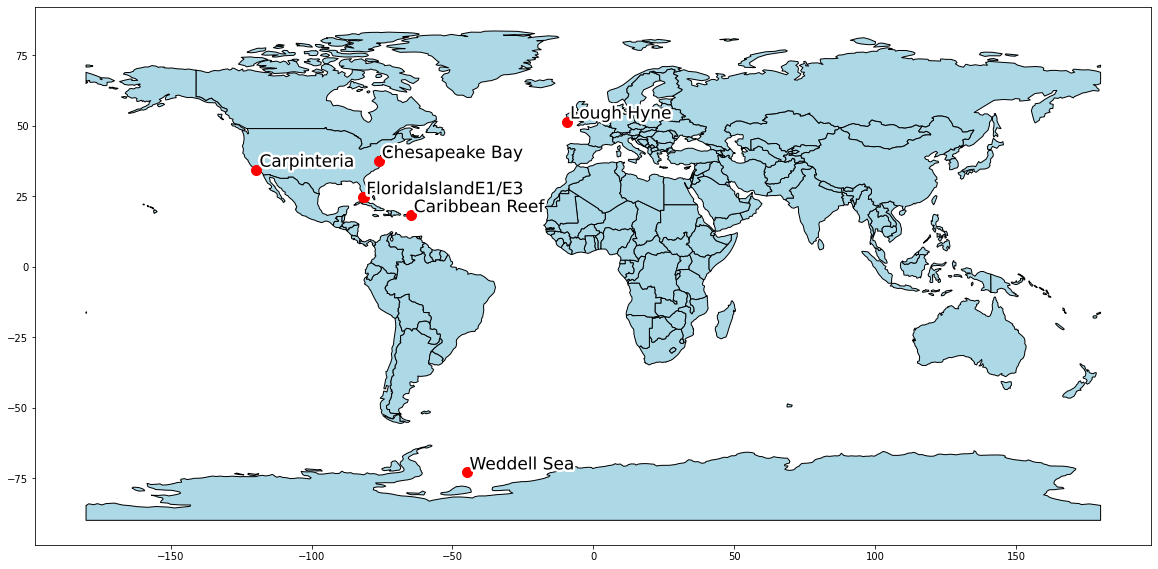

In [26]:
#Drawing a map of the seven food webs selected for the task of link prediction
gdf = geopandas.GeoDataFrame(df_7, geometry=geopandas.points_from_xy(df_7.longitude, df_7.latitude))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='lightblue', edgecolor='black', figsize=[20, 60])
gdf.plot(ax=ax, color='red', label=df_7.foodweb_name, markersize=100)

for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, df_7.foodweb_name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=17,path_effects=[pe.withStroke(linewidth=5, foreground="white")])

plt.show()

In [27]:
#Creating a data frame with longitude and latitude of all the food webs in Germany
list_of_DE_webs= ['AEW02', 'HEW36', 'HEW05', 'HEW47', 'AEW49', 'AEW17', 'SEW07', 'HEW12',
       'AEW09', 'HEW06', 'AEW08', 'HEW16', 'SEW03', 'HEW13', 'HEW22', 'HEW17',
       'SEW37', 'HEW21', 'SEW06', 'AEW07', 'SEW18', 'HEW11', 'SEW08', 'SEW48',
       'AEW05', 'AEW11', 'AEW25', 'AEW03', 'AEW01', 'AEW04', 'SEW43', 'HEW02',
       'SEW41', 'AEW06', 'HEW03', 'AEW18', 'SEW04', 'HEW01', 'AEW30', 'AEW27',
       'SEW01', 'SEW05', 'HEW04', 'SEW35', 'SEW09', 'SEW36', 'HEW10', 'SEW02']

list_df=[]
for name in list_of_DE_webs:
  list_df.append(df.loc[df.foodweb_name==name].iloc[0])

df_DE=pd.concat(list_df, axis=1).transpose()
df_DE=df_DE.filter(items=['longitude', 'latitude', 'foodweb_name'])
df_DE

,longitude,latitude,foodweb_name
13755,9.35,48.38,AEW02
72597,10.41,51.11,HEW36
51101,10.24,51.26,HEW05
75848,10.38,51.18,HEW47
42002,9.48,48.45,AEW49
32906,9.24,48.4,AEW17
87889,13.69,53.11,SEW07
59405,10.46,51.1,HEW12
28667,9.42,48.37,AEW09
54239,10.24,51.27,HEW06


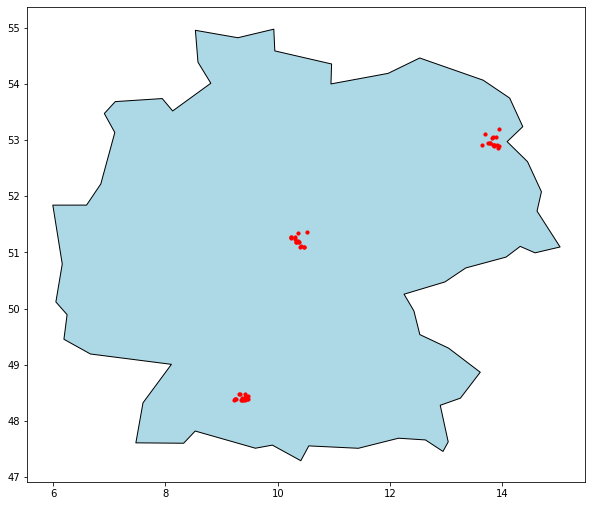

In [28]:
#Drawing a map of all the food webs in Germany
gdf = geopandas.GeoDataFrame(df_DE, geometry=geopandas.points_from_xy(df_DE.longitude, df_DE.latitude))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world[(world.name == "Germany")].plot(color='lightblue', edgecolor='black', figsize=[10, 30])
gdf.plot(ax=ax, color='red', label=df_DE.foodweb_name, markersize=10)

plt.show()


Graph with 67 nodes and 66 edges


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


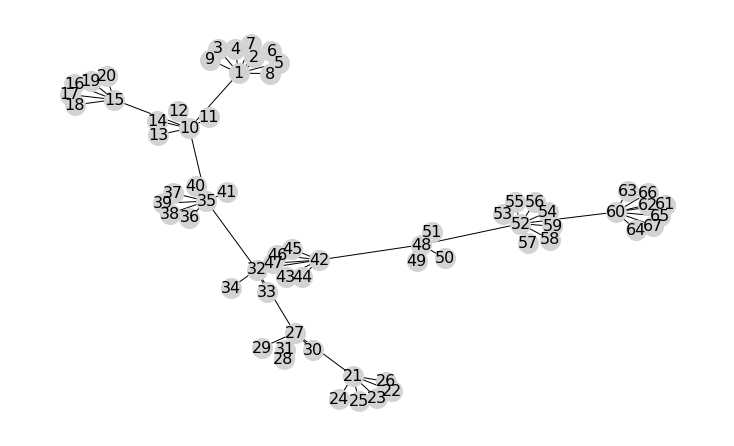

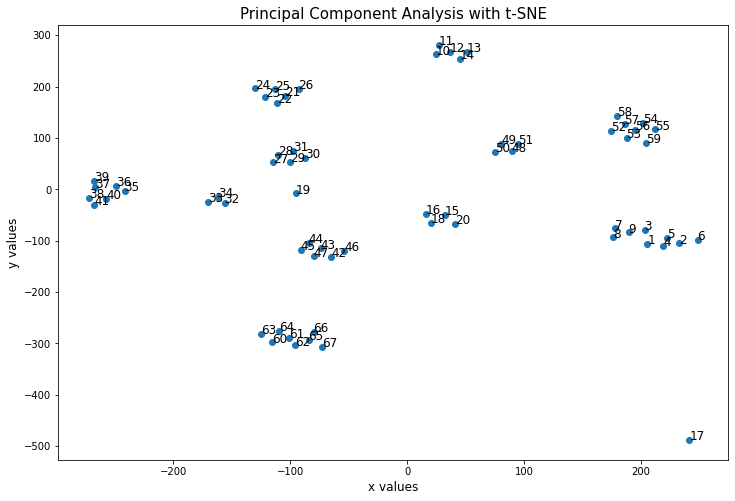

In [32]:
#Creating an example of a simple network graph and its latent space represantions with DeepWalk,
#before being plotted in two dimensions using the t-SNE visualisation method

Node_1_list=[1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 10, 10, 10, 10, 15, 15, 15, 15, 15, 10, 35, 35, 35, 35, 35,
             35, 35, 32, 32, 32, 27, 27, 27, 27, 27, 21, 21, 21, 21, 21, 32, 42, 42, 42, 42, 42, 42, 48,
             48, 48, 48, 52, 52, 52, 52, 52, 52, 52, 52, 52, 60, 60, 60, 60, 60, 60, 60]

Node_2_list=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 35, 36, 37, 38, 39, 
             40, 41, 32, 33, 34, 27, 28, 29, 30, 31, 21, 22, 23, 24, 25, 26, 42, 43, 44, 45, 46, 47, 
             48, 49, 50, 51, 52, 53, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]

df=pd.DataFrame(list(zip(Node_1_list,Node_2_list)), columns=['Node_1', 'Node_2'])


number_of_walk_length=90
number_of_dimensions=128

G = nx.from_pandas_edgelist(df, "Node_1", "Node_2") # creation of network

G_integers = nx.convert_node_labels_to_integers(G, first_label=0, ordering='default', label_attribute='attribute')
plt.figure(1,figsize=(10,6))
nx.draw(G, with_labels=True, node_color='lightgray',node_size=400,font_size=16)


labels = nx.get_node_attributes(G, 'attribute')
print(nx.info(G)) # information of number of nodes, number of edges and average degree 

df_node_names = pd.DataFrame(list(nx.nodes(G)))

model = DeepWalk(walk_length=number_of_walk_length, dimensions=number_of_dimensions, seed=0)
model.fit(G_integers)
embedding = model.get_embedding()

tsne = manifold.TSNE(n_components=2, random_state=0, init='pca', perplexity=5.0)
X_tsne = tsne.fit_transform(embedding)
df_tsne = pd.DataFrame(data=X_tsne)
df_tsne.columns = ['X','Y']
df_tsne['id'] = df_node_names

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(df_tsne.X, df_tsne.Y)
plt.xlabel("x values", size=12)
plt.ylabel("y values", size=12)
plt.title("Principal Component Analysis with t-SNE", size=15)
for index in range(len(df_tsne)):
  ax.text(df_tsne.X[index], df_tsne.Y[index], df_tsne.id[index], size=12)